In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import pickle
import matplotlib.pyplot as plt

In [3]:
# Load all reviews files
df = pd.read_csv('C:/Users/Jian/Desktop/BIA-660/dataset/all_reviews_processed.csv')
# Dataframe only contains reviews column
df = df['Review']

In [4]:
vectorizer = CountVectorizer()
# Fit and Transform reviews
data_vectorized = vectorizer.fit_transform(df)

In [6]:
# Parameters to search through for n_components from 10 to 15
search_params = {'n_components': [10,11,12,13,14,15]}
# Initalize LDA
lda = LatentDirichletAllocation(n_jobs=-1)
# GridSearch 
model = GridSearchCV(lda, param_grid=search_params)
# Fit the model
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(n_jobs=-1),
             param_grid={'n_components': [10, 11, 12, 13, 14, 15]})

In [7]:
# Extra the best n_components
best_lda_model = model.best_estimator_
print("Best Model's Params: ", model.best_params_)
print("Best Log Likelihood Score: ", "{:.2f}".format(model.best_score_))
print("Model Perplexity: ", "{:.2f}".format(best_lda_model.perplexity(data_vectorized)))

Best Model's Params:  {'n_components': 10}
Best Log Likelihood Score:  -3596144.56
Model Perplexity:  1672.63


In [8]:
n = [10,11,12,13,14,15]
# Get the mean of scores
all_scores = model.cv_results_['mean_test_score']

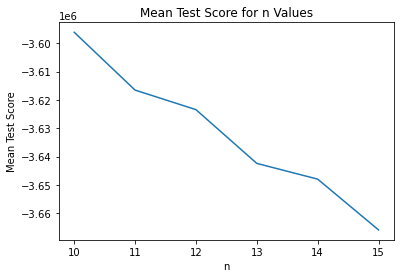

In [17]:
# Plot the n and Mean Test Scores
plt.plot(n, all_scores)
plt.ylabel("Mean Test Score")
plt.xlabel("n")
plt.title("Mean Test Score for n Values")
plt.savefig('C:/Users/Jian/Desktop/BIA-660/lda_mean_scores.png', dpi=300, facecolor='white', transparent=False)
plt.show()

In [10]:
# Retrieve the best parameter
n_components = model.best_params_['n_components']

# Create optimized model
optimized_lda = LatentDirichletAllocation(n_components = n_components, n_jobs=-1)
lda_model = optimized_lda.fit(data_vectorized)

# Save Vectorizer and Model
pickle.dump(lda_model, open('C:/Users/Jian/Desktop/BIA-660/model/lda_model.sav', 'wb'))
pickle.dump(vectorizer, open("C:/Users/Jian/Desktop/BIA-660/model/lda_vectorizer.sav", "wb"))